# Predictive Analysis

In [ ]:
# Import the required libraries
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt

In [ ]:
# Read Customer's data
data = pd.read_csv("C:\\Users\\khush\\Downloads\\data.csv", encoding='unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Data Cleaning and Preprocessing

In [ ]:
# Info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Check for null values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Delete rows with null values
data.dropna(subset = 'CustomerID', inplace=True)

In [ ]:
# Check for null values again
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Data after deleting null rows
data.shape

(406829, 8)

In [ ]:
# Check for duplicates
data.duplicated().sum()

5225

In [ ]:
# Deleting duplicate values
data.drop_duplicates(inplace=True)
data.shape

(401604, 8)

### Exploratory Data Analysis

In [ ]:
# Check for unique values in categorical columns
data['CustomerID'].value_counts()

17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
           ... 
18068.0       1
13256.0       1
15590.0       1
16138.0       1
15389.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [ ]:
data['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
PINK/WHITE GLASS DEMI CHOKER             1
 I LOVE LONDON MINI RUCKSACK             1
SET 36 COLOURING PENCILS DOILEY          1
SET 12 COLOURING PENCILS DOILEY          1
PEARL AND CHERRY QUARTZ BRACLET          1
Name: Description, Length: 3896, dtype: int64

In [ ]:
data['Country'].value_counts()

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

### Feature Engineering and Data Transformation

In [ ]:
# Change the data type of InvoiceDate column from object to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
# Create a new feature Month using existing column InvoiceDate
data['Month'] = data['InvoiceDate'].dt.month

In [ ]:
# Create new column Year using InvoiceDate
data['Year'] = data['InvoiceDate'].dt.year

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011


In [ ]:
# Create new column total_bill to show the actual amount of one purchase
data['total_bill'] = data['Quantity']*data['UnitPrice']

In [ ]:
# Create annual_total_bill using merge and groupby functions
annual_bill = data.groupby('CustomerID')['total_bill'].sum()
data = data.merge(annual_bill, on='CustomerID', suffixes=('','_annualy'))
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,total_bill,total_bill_annualy
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30,5303.48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00,5303.48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,12,2011,15.00,848.55
401600,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55
401601,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55
401602,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,12,2011,24.96,848.55


In [ ]:
# After adding new columns
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,total_bill,total_bill_annualy
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30,5303.48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00,5303.48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34,5303.48
...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,12,2011,15.00,848.55
401600,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55
401601,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,10.20,848.55
401602,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,12,2011,24.96,848.55


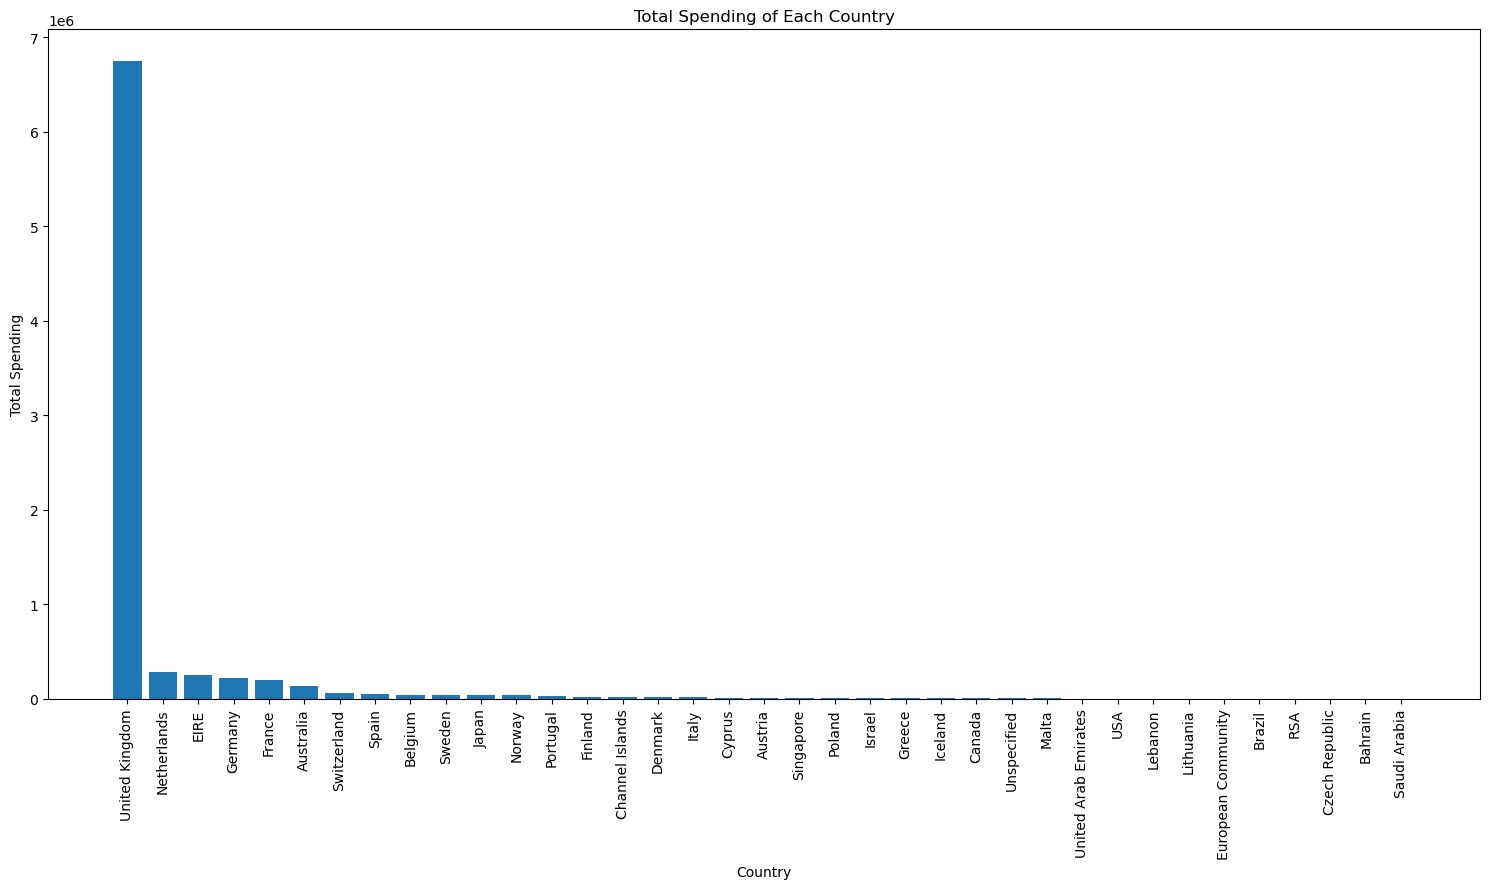

In [ ]:
#plot the spent of each country
country_spending = data.groupby('Country')['total_bill'].sum()
country_spending = country_spending.sort_values(ascending=False)
plt.figure(figsize=(15, 9))
plt.bar(country_spending.index, country_spending.values)
plt.xlabel('Country')
plt.ylabel('Total Spending')
plt.title('Total Spending of Each Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\khush\AppData\Local\Temp\ipykernel_29204\379292813.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_bill_annualy'])


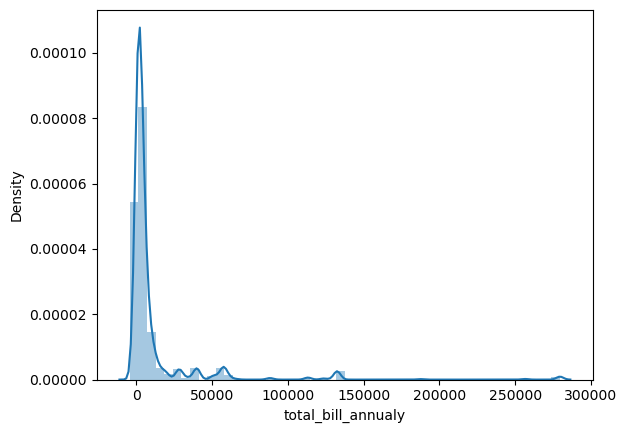

In [ ]:
sns.distplot(data['total_bill_annualy'])
plt.show()

### Predictive Model Building

In [ ]:
# Import required libraries and models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
# Encode Catgorical variables like Description and Country for regression models using LabelEncoder

data['Description'] = LabelEncoder().fit_transform(data['Description'])
data['Country'] = LabelEncoder().fit_transform(data['Country'])

data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,total_bill,total_bill_annualy
0,536365,85123A,3716,6,2010-12-01 08:26:00,2.55,17850.0,35,12,2010,15.30,5303.48
1,536365,71053,3724,6,2010-12-01 08:26:00,3.39,17850.0,35,12,2010,20.34,5303.48
2,536365,84406B,861,8,2010-12-01 08:26:00,2.75,17850.0,35,12,2010,22.00,5303.48
3,536365,84029G,1813,6,2010-12-01 08:26:00,3.39,17850.0,35,12,2010,20.34,5303.48
4,536365,84029E,2776,6,2010-12-01 08:26:00,3.39,17850.0,35,12,2010,20.34,5303.48
...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581578,22993,3063,12,2011-12-09 12:16:00,1.25,12713.0,14,12,2011,15.00,848.55
401600,581578,22907,2260,12,2011-12-09 12:16:00,0.85,12713.0,14,12,2011,10.20,848.55
401601,581578,22908,2261,12,2011-12-09 12:16:00,0.85,12713.0,14,12,2011,10.20,848.55
401602,581578,23215,1754,12,2011-12-09 12:16:00,2.08,12713.0,14,12,2011,24.96,848.55


In [ ]:
# Divide Dependent and Independent variable as required in the model

x = data[['CustomerID','Description','Quantity','UnitPrice','Country','Month','Year']]
y = data['total_bill_annualy']

In [ ]:
# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
# Instantiate and fit linear regression on train data
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Calculate required metrics on test data
y_pred = lin_reg.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)
print('R2_LINEAR:', r2_score(y_test, y_pred))

MAE: 13406.849992714475
MSE: 790033174.2338226
RMSE: 28107.52878205095
R2_LINEAR: 0.11643698891735743


In [ ]:
# Calculate required metrics on train data to check ofverfitting
y_pred_train = lin_reg.predict(x_train)
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', mean_squared_error(y_train, y_pred_train)**0.5)
print('R2_LINEAR:', r2_score(y_train, y_pred_train))

MAE: 13529.510480897192
MSE: 815373637.0870392
RMSE: 28554.748065550135
R2_LINEAR: 0.11851888605363026


### Decision Tree Regressor

In [ ]:
# Instantiate and fit Decision tree regressor on train data
dt_reg = DecisionTreeRegressor(random_state = 123)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=123)

In [ ]:
# Calculate required metrics on test data
y_pred = dt_reg.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)
print('R2_LINEAR:', r2_score(y_test, y_pred))

MAE: 225.21279272144696
MSE: 9005262.490988953
RMSE: 3000.876953656873
R2_LINEAR: 0.9899286294530046


In [ ]:
# Calculate required metrics on train data to check overfitting
y_pred_train = dt_reg.predict(x_train)
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', mean_squared_error(y_train, y_pred_train)**0.5)
print('R2_LINEAR:', r2_score(y_train, y_pred_train))

MAE: 2.573733429395979e-10
MSE: 1.380993596943698e-18
RMSE: 1.1751568392958014e-09
R2_LINEAR: 1.0


### Random Forest Regressor

In [ ]:
# Instantiate and fit Random forest regressor on train data
rf_reg = RandomForestRegressor(random_state=123)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=123)

In [ ]:
# Calculate required metrics on test data
y_pred = rf_reg.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)
print('R2_LINEAR:', r2_score(y_test, y_pred))

MAE: 282.1477545127983
MSE: 6921336.3822287265
RMSE: 2630.8432834794107
R2_LINEAR: 0.9922592657953526


In [ ]:
# Calculate required metrics on train data to check overfitting
y_pred_train = rf_reg.predict(x_train)
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', mean_squared_error(y_train, y_pred_train)**0.5)
print('R2_LINEAR:', r2_score(y_train, y_pred_train))

MAE: 103.15703681712463
MSE: 800192.596760299
RMSE: 894.5348493827946
R2_LINEAR: 0.9991349307489462


# Customer Segmentation

(Data Preprocessing before clustering)

In [ ]:
# Rename the column for easy model implementation
data.rename(columns={'total_bill_annualy':'Annual_Spending'}, inplace=True)

In [ ]:
# Creating a copy of data as df
df = data.copy()
df.shape

(401604, 12)

In [ ]:
# Extracting required features out of df for further clustering

# Three features we chose here: -Recency (tells how recent the purchase has been made)
#                               -Frequently (how frequently a customer has purchased)
#                               -Monetary-value (the value that purchase holds)



df = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
     'InvoiceNo': 'nunique', 'total_bill': 'sum'})
df.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'total_bill':'Monetary-value'}, inplace=True)

In [ ]:
df

,Recency,Frequency,Monetary-value
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,3,176.60


### K-means Clustering

In [ ]:
# Import KMeans
from sklearn.cluster import KMeans , AgglomerativeClustering

In [ ]:
# Try different clusters
cluster_values = list(range(1,10))
inertias=[]

for c in cluster_values:
    model = KMeans(n_clusters = c,random_state=123)
    model.fit(df)
    inertias.append(model.inertia_)

C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\khush\anaconda3\Lib\site-packages\sklearn\clust

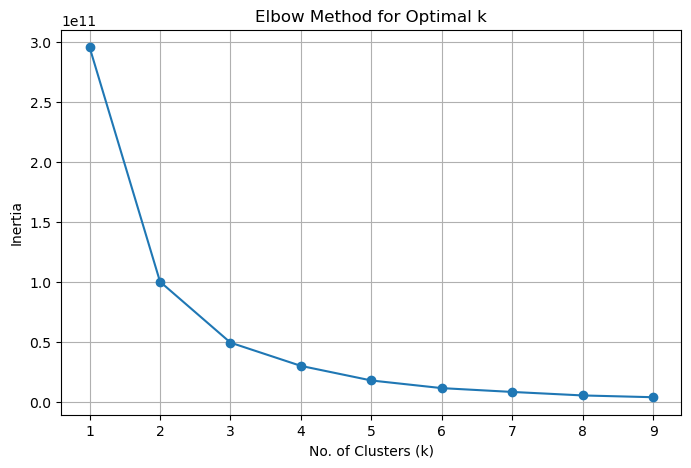

In [ ]:
# Plot the Elbow Method to find optimal value of k
plt.figure(figsize=(8, 5))
plt.plot(cluster_values, inertias, marker='o')
plt.xlabel('No. of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(cluster_values)
plt.grid(True)
plt.show()

In [ ]:
# Instantiate and fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Print the resulting clusters with value counts
print("K-Means Clustering:",)
print(df['KMeans_Cluster'].value_counts())

K-Means Clustering:
0    4346
2      23
1       3
Name: KMeans_Cluster, dtype: int64


### Agglomerative Clustering

In [ ]:
# Instantiate and fit Agglomerative Clustering
agg_cl = AgglomerativeClustering(n_clusters=3)
df['Agg_Cl'] = agg_cl.fit_predict(df)

In [ ]:
# Print the resulting clusters with no. of values they hold
print("\nAgglomerative Hierarchical Clustering:")
print(df['Agg_Cl'].value_counts())


Agglomerative Hierarchical Clustering:
1    4338
2      27
0       7
Name: Agg_Cl, dtype: int64


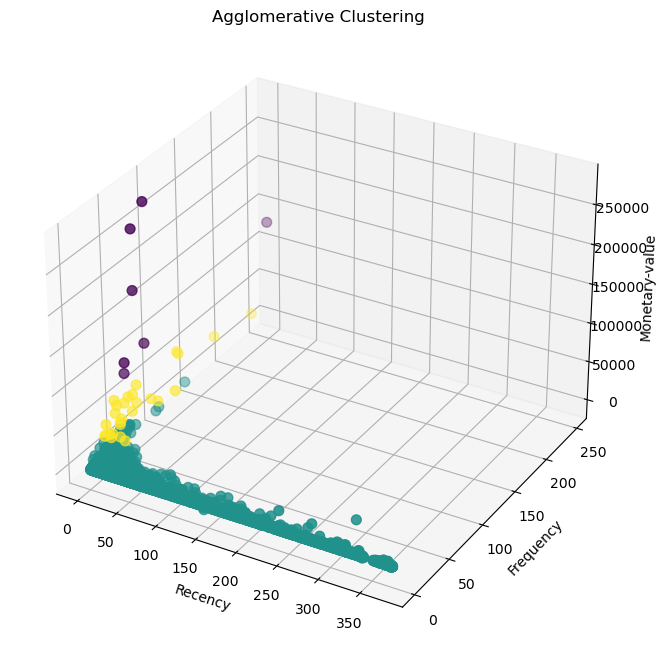

In [ ]:
# 3-D Plot of Agglomerative Clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Recency'], df['Frequency'], df['Monetary-value'], c=df['Agg_Cl'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary-value')
ax.set_title('Agglomerative Clustering')
plt.show()

## Results

### <u>Three clusters classified :</u>


**Blue (Prospects)** - This segment of customers contains <u>recent as well as old ones</u> as they are all over the Recency scale, with a <u>low Monetary-value</u> which suggests that they consume less. Also, the <u>Frequency is less</u> for the old customers than new ones which further indicates that the people in this are either uninterested (for the ones with high recency) or they need to be provided with some great offers (the ones with low recency), to keep them around.


**Yellow (Suspects)** - This segment contains customers with <u>low Recency</u> which indicates that they recently made purchases, having <u>medium Frequency</u> indicating quite frequently purchasing customers, and <u>medium monetary-value</u> ie. made selective and good purchase. As per these values, this group of customers can be classified as the ones who would stick by in the long run if they're engaged enough.


**Purple (Leads)** - In this segment we have <u>low Recency</u> which indicates that the purchases have been made recently, also with <u>medium Frequency</u> and with <u>high Monetary-value.</u> This clearly suggests that the customers in this cluster are the ones with great expenditures and they're frequent too, which is great. These clients lead to profitable businesses and should be kept around by rewards through some offers.


Here, Prospect is someone who is on your list, but has not yet made any kind of commitment to you.

Suspect is someone who fits the profile of current customers. This is an extremely valuable prospect type to track.

Leads are your prospects whose behaviour dictates they are specifically interested in a specific product or service.